## Libraries

In [36]:
import os 

import numpy as np 
import pandas as pd

from tqdm import tqdm

# import the folium library
import folium

import matplotlib.pyplot as plt 

from linearmodels import PooledOLS
import statsmodels.api as sm

## Data

In [37]:
wfp_benin = pd.read_csv("../data/wfp_food_prices_ben.csv")
wfp_benin.drop(0, inplace=True)

In [38]:
wfp_benin

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2002-01-15,Alibori,Malanville,Malanville (CBM),11.86,3.38,cereals and tubers,Maize,KG,actual,Wholesale,XOF,145.0,0.2208
2,2002-01-15,Alibori,Malanville,Malanville (CBM),11.86,3.38,cereals and tubers,Millet,KG,actual,Wholesale,XOF,145.0,0.2208
3,2002-01-15,Alibori,Malanville,Malanville (CBM),11.86,3.38,cereals and tubers,Rice (imported),KG,actual,Wholesale,XOF,293.33,0.4467
4,2002-01-15,Alibori,Malanville,Malanville (CBM),11.86,3.38,cereals and tubers,Sorghum,KG,actual,Wholesale,XOF,141.67,0.2157
5,2003-01-15,Alibori,Malanville,Malanville (CBM),11.86,3.38,cereals and tubers,Maize,KG,actual,Wholesale,XOF,106.0,0.1614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59813,2022-09-15,Zou,Zogbodome,Zogbodomey,7.05721907875719,2.24823682355608,vegetables and fruits,Coconut (dried),KG,actual,Retail,XOF,512.0,0.7797
59814,2022-09-15,Zou,Zogbodome,Zogbodomey,7.05721907875719,2.24823682355608,vegetables and fruits,Okra (fresh),KG,actual,Retail,XOF,310.75,0.4732
59815,2022-09-15,Zou,Zogbodome,Zogbodomey,7.05721907875719,2.24823682355608,vegetables and fruits,Onions,KG,actual,Retail,XOF,490.25,0.7466
59816,2022-09-15,Zou,Zogbodome,Zogbodomey,7.05721907875719,2.24823682355608,vegetables and fruits,"Peppers (red, dry)",KG,actual,Retail,XOF,4711.54,7.1753


## Basic EDA

In [39]:
# convert to datetime
wfp_benin["date"] = pd.to_datetime(wfp_benin["date"])

In [40]:
wfp_benin["latitude"] = pd.to_numeric(wfp_benin["latitude"])
wfp_benin["longitude"] = pd.to_numeric(wfp_benin["longitude"])
wfp_benin["price"] = pd.to_numeric(wfp_benin["price"])
wfp_benin["usdprice"] = pd.to_numeric(wfp_benin["usdprice"])

In [41]:
wfp_benin

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2002-01-15,Alibori,Malanville,Malanville (CBM),11.860000,3.380000,cereals and tubers,Maize,KG,actual,Wholesale,XOF,145.00,0.2208
2,2002-01-15,Alibori,Malanville,Malanville (CBM),11.860000,3.380000,cereals and tubers,Millet,KG,actual,Wholesale,XOF,145.00,0.2208
3,2002-01-15,Alibori,Malanville,Malanville (CBM),11.860000,3.380000,cereals and tubers,Rice (imported),KG,actual,Wholesale,XOF,293.33,0.4467
4,2002-01-15,Alibori,Malanville,Malanville (CBM),11.860000,3.380000,cereals and tubers,Sorghum,KG,actual,Wholesale,XOF,141.67,0.2157
5,2003-01-15,Alibori,Malanville,Malanville (CBM),11.860000,3.380000,cereals and tubers,Maize,KG,actual,Wholesale,XOF,106.00,0.1614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59813,2022-09-15,Zou,Zogbodome,Zogbodomey,7.057219,2.248237,vegetables and fruits,Coconut (dried),KG,actual,Retail,XOF,512.00,0.7797
59814,2022-09-15,Zou,Zogbodome,Zogbodomey,7.057219,2.248237,vegetables and fruits,Okra (fresh),KG,actual,Retail,XOF,310.75,0.4732
59815,2022-09-15,Zou,Zogbodome,Zogbodomey,7.057219,2.248237,vegetables and fruits,Onions,KG,actual,Retail,XOF,490.25,0.7466
59816,2022-09-15,Zou,Zogbodome,Zogbodomey,7.057219,2.248237,vegetables and fruits,"Peppers (red, dry)",KG,actual,Retail,XOF,4711.54,7.1753


In [42]:
wfp_benin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59817 entries, 1 to 59817
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       59817 non-null  datetime64[ns]
 1   admin1     59817 non-null  object        
 2   admin2     59817 non-null  object        
 3   market     59817 non-null  object        
 4   latitude   59817 non-null  float64       
 5   longitude  59817 non-null  float64       
 6   category   59817 non-null  object        
 7   commodity  59817 non-null  object        
 8   unit       59817 non-null  object        
 9   priceflag  59817 non-null  object        
 10  pricetype  59817 non-null  object        
 11  currency   59817 non-null  object        
 12  price      59817 non-null  float64       
 13  usdprice   59817 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 6.4+ MB


In [43]:
# consider only data after 2010
wfp_benin = wfp_benin.loc[wfp_benin.date>='2019-01-01']

In [44]:
wfp_benin.date.max()

Timestamp('2022-09-15 00:00:00')

In [48]:
pd.date_range('2019-01-15', '2022-09-15', freq='')

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31'],
              dtype='datetime64[ns]', freq='M')

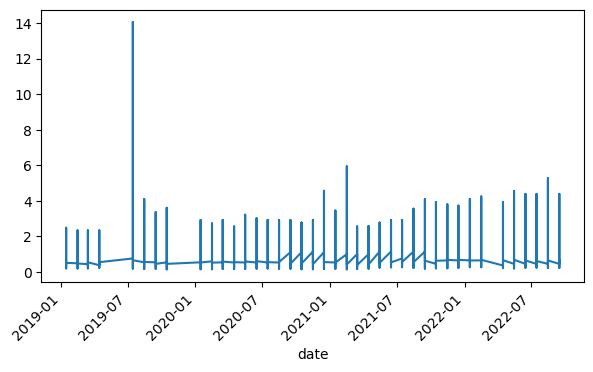

In [9]:
plt.figure(figsize=(7, 4))
wfp_benin.loc[wfp_benin.admin1=="Alibori"].set_index("date")["usdprice"].plot()
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='date'>

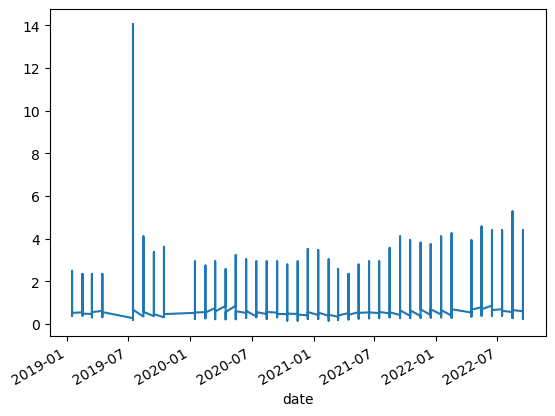

In [10]:
wfp_benin.loc[((wfp_benin.admin1=="Alibori") & (wfp_benin.category=="vegetables and fruits"))].set_index("date")["usdprice"].plot()

In [11]:
wfp_benin.groupby("admin1")["commodity"].apply(list).apply(sorted).apply(np.unique).apply(len)

admin1
Alibori       46
Atakora       48
Atlantique    48
Borgou        48
Collines      48
Couffo        47
Donga         44
Littoral      48
Mono          40
Oueme         48
Plateau       47
Zou           49
Name: commodity, dtype: int64

In [12]:
wfp_benin.groupby("admin1")["commodity"].apply(list).apply(sorted).apply(np.unique)

admin1
Alibori       [Beans (black), Beans (red), Beans (white), Ca...
Atakora       [Beans (black), Beans (red), Beans (white), Ca...
Atlantique    [Beans (black), Beans (red), Beans (white), Ca...
Borgou        [Beans (black), Beans (red), Beans (white), Ca...
Collines      [Beans (black), Beans (red), Beans (white), Ca...
Couffo        [Beans (black), Beans (red), Beans (white), Ca...
Donga         [Beans (black), Beans (red), Beans (white), Ca...
Littoral      [Beans (black), Beans (red), Beans (white), Ca...
Mono          [Beans (red), Beans (white), Cabbage, Carrots,...
Oueme         [Beans (black), Beans (red), Beans (white), Ca...
Plateau       [Beans (black), Beans (red), Beans (white), Ca...
Zou           [Beans (black), Beans (red), Beans (white), Ca...
Name: commodity, dtype: object

In [13]:
commodities_by_dep = wfp_benin.groupby("admin1")["commodity"].apply(list).apply(sorted).apply(np.unique).apply(set).values

In [14]:
commodities_by_dep = [y for x in commodities_by_dep for y in x]

In [15]:
pd.Series(commodities_by_dep).value_counts()

Oil (groundnut)                  12
Soybeans                         12
Fish (fresh, silvi)              12
Fish (tilapia)                   12
Sorghum (red)                    12
Yam                              12
Lemons                           12
Yam (white)                      12
Oranges                          12
Wheat                            12
Beans (red)                      12
Oil (palm)                       12
Wheat flour (imported)           12
Potatoes                         12
Sweet potatoes                   12
Peppers (red, dry)               12
Rice (local)                     12
Onions                           12
Okra (fresh)                     12
Papaya                           12
Rice (imported)                  12
Cassava meal (gari)              12
Cassava flour                    12
Leafy vegetables                 12
Groundnuts (Bambara)             12
Carrots                          12
Coconut (dried)                  12
Maize (white)               

In [16]:
pd.Series(commodities_by_dep).value_counts()[pd.Series(commodities_by_dep).value_counts()==12].shape

(36,)

In [17]:
wfp_benin.category.value_counts()

cereals and tubers       23924
vegetables and fruits    16057
pulses and nuts           9383
oil and fats              3658
meat, fish and eggs       2691
miscellaneous food         240
Name: category, dtype: int64

In [18]:
wfp_benin.loc[wfp_benin.category=="miscellaneous food"].commodity.value_counts()

Snail    240
Name: commodity, dtype: int64

In [19]:
commodities_to_keep = pd.Series(commodities_by_dep).value_counts()[pd.Series(commodities_by_dep).value_counts()==12].index.tolist()

In [20]:
commodities_to_keep

['Oil (groundnut)',
 'Soybeans',
 'Fish (fresh, silvi)',
 'Fish (tilapia)',
 'Sorghum (red)',
 'Yam',
 'Lemons',
 'Yam (white)',
 'Oranges',
 'Wheat',
 'Beans (red)',
 'Oil (palm)',
 'Wheat flour (imported)',
 'Potatoes',
 'Sweet potatoes',
 'Peppers (red, dry)',
 'Rice (local)',
 'Onions',
 'Okra (fresh)',
 'Papaya',
 'Rice (imported)',
 'Cassava meal (gari)',
 'Cassava flour',
 'Leafy vegetables',
 'Groundnuts (Bambara)',
 'Carrots',
 'Coconut (dried)',
 'Maize (white)',
 'Groundnuts (small, unshelled)',
 'Cassava meal (tapioca)',
 'Beans (white)',
 'Millet',
 'Cassava meal (gari, fine)',
 'Peas (green, dry)',
 'Cabbage',
 'Tomatoes']

In [21]:
wfp_benin = wfp_benin.loc[wfp_benin.commodity.isin(commodities_to_keep)]

In [22]:
wfp_benin.loc[wfp_benin.pricetype=="Wholesale"].commodity.unique()

array([], dtype=object)

In [23]:
print(sorted(wfp_benin.loc[wfp_benin.pricetype=="Retail"].commodity.unique()))

['Beans (red)', 'Beans (white)', 'Cabbage', 'Carrots', 'Cassava flour', 'Cassava meal (gari)', 'Cassava meal (gari, fine)', 'Cassava meal (tapioca)', 'Coconut (dried)', 'Fish (fresh, silvi)', 'Fish (tilapia)', 'Groundnuts (Bambara)', 'Groundnuts (small, unshelled)', 'Leafy vegetables', 'Lemons', 'Maize (white)', 'Millet', 'Oil (groundnut)', 'Oil (palm)', 'Okra (fresh)', 'Onions', 'Oranges', 'Papaya', 'Peas (green, dry)', 'Peppers (red, dry)', 'Potatoes', 'Rice (imported)', 'Rice (local)', 'Sorghum (red)', 'Soybeans', 'Sweet potatoes', 'Tomatoes', 'Wheat', 'Wheat flour (imported)', 'Yam', 'Yam (white)']


In [24]:
wfp_benin.to_csv("../data/wfp_food_prices_ben_2010_2022.csv", index=False)

<AxesSubplot:xlabel='date'>

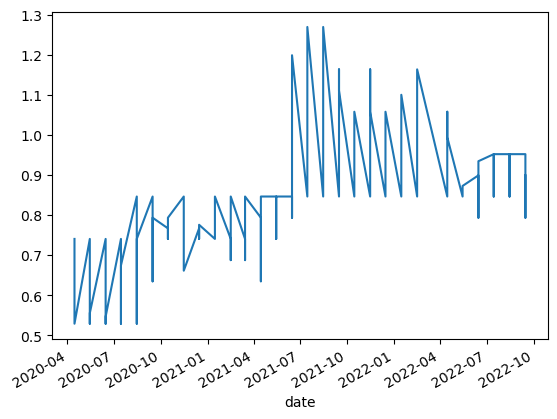

In [25]:
wfp_benin.loc[((wfp_benin.admin1=="Alibori") & (wfp_benin.commodity=="Cassava meal (gari, fine)"))].set_index("date")["usdprice"].plot()

<AxesSubplot:xlabel='date'>

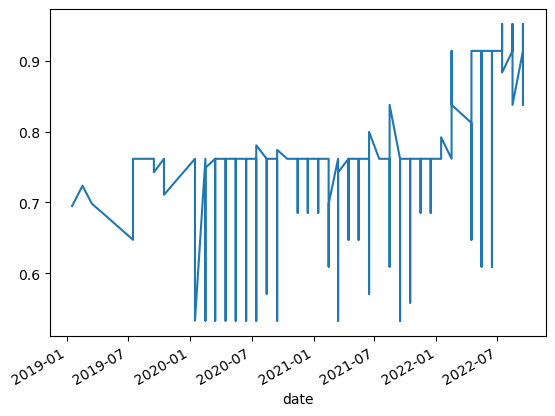

In [26]:
wfp_benin.loc[((wfp_benin.admin1=="Alibori") & (wfp_benin.commodity=="Wheat flour (imported)"))].set_index("date")["usdprice"].plot()

<AxesSubplot:xlabel='date'>

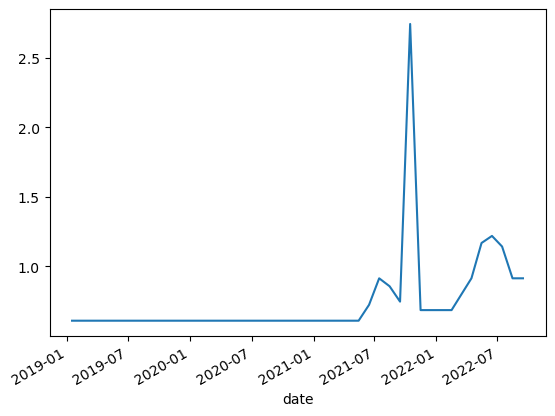

In [27]:
wfp_benin.loc[((wfp_benin.admin1=="Littoral") & (wfp_benin.commodity=="Wheat flour (imported)"))].set_index("date")["usdprice"].plot()

<AxesSubplot:xlabel='date'>

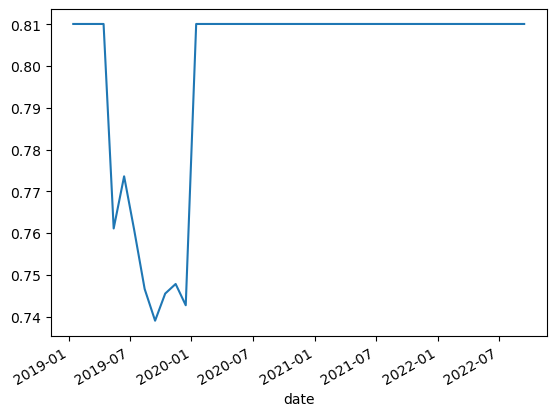

In [28]:
wfp_benin.loc[((wfp_benin.admin1=="Littoral") & (wfp_benin.commodity=="Rice (imported)"))].set_index("date")["usdprice"].plot()

<AxesSubplot:xlabel='date'>

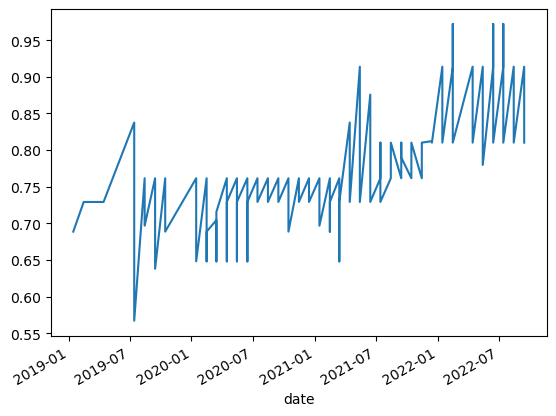

In [29]:
wfp_benin.loc[((wfp_benin.admin1=="Alibori") & (wfp_benin.commodity=="Rice (imported)"))].set_index("date")["usdprice"].plot()

<AxesSubplot:xlabel='date'>

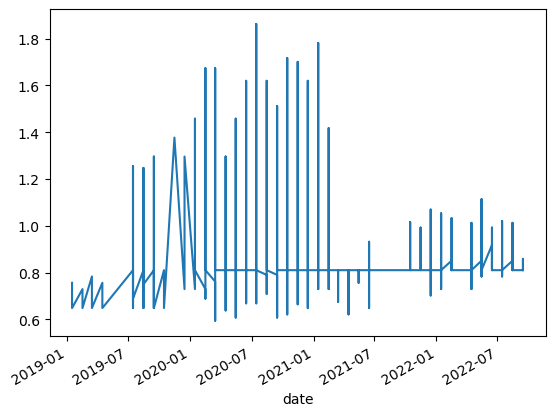

In [30]:
wfp_benin.loc[((wfp_benin.admin1=="Oueme") & (wfp_benin.commodity=="Rice (imported)"))].set_index("date")["usdprice"].plot()

<AxesSubplot:xlabel='date'>

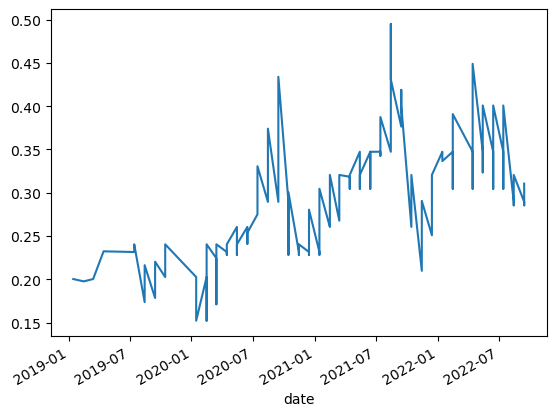

In [31]:
wfp_benin.loc[((wfp_benin.admin1=="Alibori") & (wfp_benin.commodity=="Maize (white)"))].set_index("date")["usdprice"].plot()

<AxesSubplot:xlabel='date'>

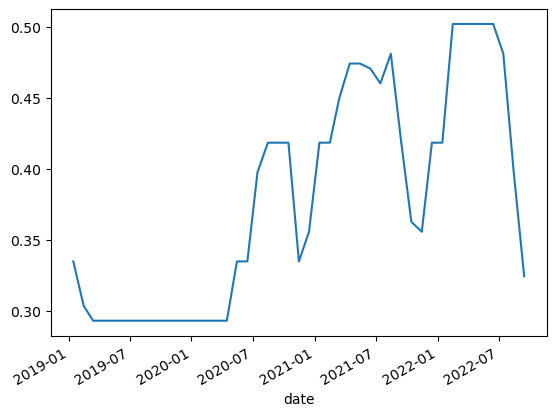

In [32]:
wfp_benin.loc[((wfp_benin.admin1=="Littoral") & (wfp_benin.commodity=="Maize (white)"))].set_index("date")["usdprice"].plot()

<AxesSubplot:xlabel='date'>

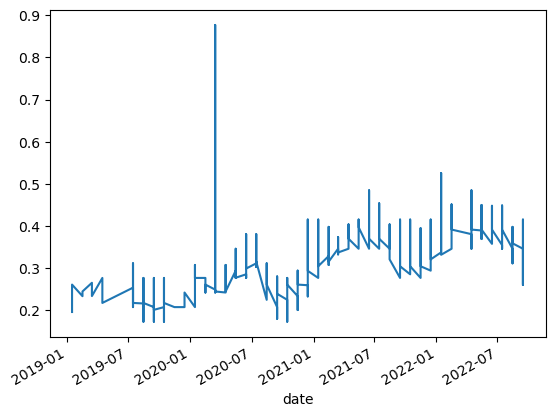

In [33]:
wfp_benin.loc[((wfp_benin.admin1=="Oueme") & (wfp_benin.commodity=="Maize (white)"))].set_index("date")["usdprice"].plot()

<AxesSubplot:xlabel='date'>

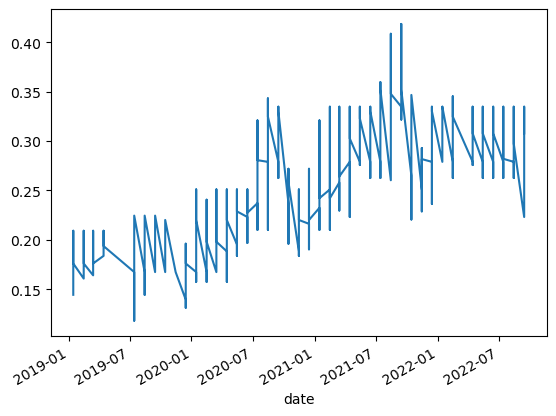

In [34]:
wfp_benin.loc[((wfp_benin.admin1=="Atakora") & (wfp_benin.commodity=="Maize (white)"))].set_index("date")["usdprice"].plot()

<AxesSubplot:xlabel='date'>

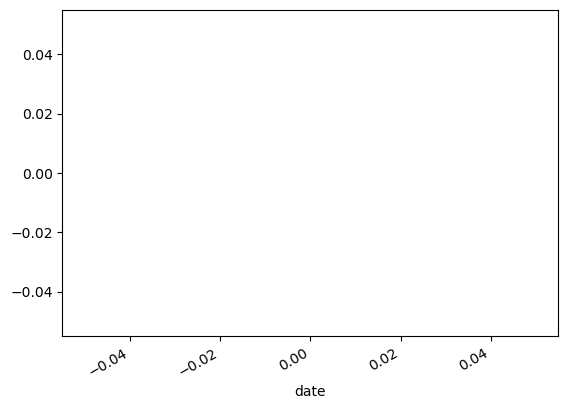

In [35]:
wfp_benin.loc[((wfp_benin.admin1=="Atakora") & (wfp_benin.commodity=="Sorghum"))].set_index("date")["usdprice"].plot()

## Modeling

In [35]:
wfp_benin = wfp_benin.loc[wfp_benin.pricetype!="Wholesale"]

### Beans (white)

In [36]:
white_beans = wfp_benin.loc[wfp_benin.commodity=="Beans (white)"]

In [37]:
white_beans.groupby("admin1")["date"].apply(list).apply(len)

admin1
Alibori       188
Atakora       274
Atlantique    251
Borgou        339
Collines      211
Couffo        127
Donga         144
Littoral      122
Mono           65
Oueme         251
Plateau       239
Zou           245
Name: date, dtype: int64

In [39]:
white_beans.groupby("admin2")["date"].apply(list).apply(len)

admin2
Abomey            35
Abomey-calavi     36
Adja-ouere        78
Adjohoun          39
Allada            35
Aplahoue          63
Banikoara         62
Bassila           37
Bembereke         38
Bohicon           65
Bonou             37
Come              65
Cotonou          122
Cove              35
Dangbo            74
Dassa             38
Djougou           66
Dogbo-tota        35
Glazoue           68
Kalale            59
Karimama          32
Kerou             64
Ketou             67
Klouekanme        29
Kobli             41
Malanville        94
Natitingou        66
Ndali             14
Nikki             68
Ouake             41
Ouesse            42
Ouinhi            34
Parakou           68
Pehonko           37
Pobe              61
Porto-novo       101
Sakete            33
Savalou           63
Sinende           59
So-ava            34
Tanguieta         66
Tchaourou         33
Toffo             75
Zangnanado        41
Ze                71
Zogbodome         35
Name: date, dtype: int64

In [48]:
pd.get_dummies(wfp_benin, columns=["market"])

,date,admin1,admin2,latitude,longitude,category,commodity,unit,priceflag,pricetype,...,market_So-Ava,market_Sèdjè-Dénou,market_Sékou,market_Tanguiéta,market_Tatonnoukon,market_Tchaourou,market_Yoko,market_Zinvié,market_Zogbodomey,market_Zè
416,2010-01-15,Littoral,Cotonou,6.374875,2.430846,cereals and tubers,Cassava meal (gari),KG,actual,Retail,...,0,0,0,0,0,0,0,0,0,0
417,2010-01-15,Littoral,Cotonou,6.374875,2.430846,cereals and tubers,Maize (white),KG,actual,Retail,...,0,0,0,0,0,0,0,0,0,0
418,2010-01-15,Littoral,Cotonou,6.374875,2.430846,cereals and tubers,Rice (imported),KG,actual,Retail,...,0,0,0,0,0,0,0,0,0,0
419,2010-01-15,Littoral,Cotonou,6.374875,2.430846,cereals and tubers,Sorghum,KG,actual,Retail,...,0,0,0,0,0,0,0,0,0,0
420,2010-01-15,Littoral,Cotonou,6.374875,2.430846,pulses and nuts,Beans (white),KG,actual,Retail,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59813,2022-09-15,Zou,Zogbodome,7.057219,2.248237,vegetables and fruits,Coconut (dried),KG,actual,Retail,...,0,0,0,0,0,0,0,0,1,0
59814,2022-09-15,Zou,Zogbodome,7.057219,2.248237,vegetables and fruits,Okra (fresh),KG,actual,Retail,...,0,0,0,0,0,0,0,0,1,0
59815,2022-09-15,Zou,Zogbodome,7.057219,2.248237,vegetables and fruits,Onions,KG,actual,Retail,...,0,0,0,0,0,0,0,0,1,0
59816,2022-09-15,Zou,Zogbodome,7.057219,2.248237,vegetables and fruits,"Peppers (red, dry)",KG,actual,Retail,...,0,0,0,0,0,0,0,0,1,0


In [49]:
white_beans.date.unique()

array(['2010-01-15T00:00:00.000000000', '2010-02-15T00:00:00.000000000',
       '2010-03-15T00:00:00.000000000', '2010-04-15T00:00:00.000000000',
       '2010-05-15T00:00:00.000000000', '2010-06-15T00:00:00.000000000',
       '2010-07-15T00:00:00.000000000', '2010-08-15T00:00:00.000000000',
       '2010-09-15T00:00:00.000000000', '2010-10-15T00:00:00.000000000',
       '2010-11-15T00:00:00.000000000', '2010-12-15T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-02-15T00:00:00.000000000',
       '2011-03-15T00:00:00.000000000', '2011-04-15T00:00:00.000000000',
       '2011-05-15T00:00:00.000000000', '2011-06-15T00:00:00.000000000',
       '2011-07-15T00:00:00.000000000', '2011-08-15T00:00:00.000000000',
       '2011-09-15T00:00:00.000000000', '2011-10-15T00:00:00.000000000',
       '2011-11-15T00:00:00.000000000', '2011-12-15T00:00:00.000000000',
       '2012-01-15T00:00:00.000000000', '2012-02-15T00:00:00.000000000',
       '2012-03-15T00:00:00.000000000', '2012-04-15

In [47]:
white_beans.set_index(["admin1", "date"])

admin2      market  latitude  longitude  \
admin1   date                                                      
Littoral 2010-01-15     Cotonou    Dantokpa  6.374875   2.430846   
         2010-02-15     Cotonou    Dantokpa  6.374875   2.430846   
         2010-03-15     Cotonou    Dantokpa  6.374875   2.430846   
         2010-04-15     Cotonou    Dantokpa  6.374875   2.430846   
         2010-05-15     Cotonou    Dantokpa  6.374875   2.430846   
...                         ...         ...       ...        ...   
Zou      2022-09-15     Bohicon     Bohicon  7.179768   2.071422   
         2022-09-15        Cove        Covè  7.217498   2.342463   
         2022-09-15      Ouinhi       Dasso  7.012241   2.464870   
         2022-09-15  Zangnanado    Kpedekpo  7.231898   2.500096   
         2022-09-15   Zogbodome  Zogbodomey  7.057219   2.248237   

                            category      commodity unit priceflag pricetype  \
admin1   date                                                                  
Littoral 2010-01-15  pulses and nuts  Beans (white)   KG    actual    Retail   
         2010-02-15  pulses and nuts  Beans (white)   KG    actual    Retail   
         2010-03-15  pulses and nuts  Beans (white)   KG    actual    Retail   
         2010-04-15  pulses and nuts  Beans (white)   KG    actual    Retail   
         2010-05-15  pulses and nuts  Beans (white)   KG    actual    Retail   
...                              ...            ...  ...       ...       ...   
Zou      2022-09-15  pulses and nuts  Beans (white)   KG    actual    Retail   
         2022-09-15  pulses and nuts  Beans (white)   KG    actual    Retail   
         2022-09-15  pulses and nuts  Beans (white)   KG    actual    Retail   
         2022-09-15  pulses and nuts  Beans (white)   KG    actual    Retail   
         2022-09-15  pulses and nuts  Beans (white)   KG    actual    Retail   

                    currency   price  usdprice  
admin1   date                                   
Littoral 2010-01-15      XOF  490.00    0.7462  
         2010-02-15      XOF  495.00    0.7538  
         2010-03-15      XOF  545.00    0.8300  
         2010-04-15      XOF  545.00    0.8300  
         2010-05-15      XOF  545.00    0.8300  
...                      ...     ...       ...  
Zou      2022-09-15      XOF  706.52    1.0760  
         2022-09-15      XOF  788.04    1.2001  
         2022-09-15      XOF  516.30    0.7863  
         2022-09-15      XOF  679.35    1.0346  
         2022-09-15      XOF  652.17    0.9932  

[2456 rows x 12 columns]

In [46]:
# Perform PooledOLS
exog = sm.tools.tools.add_constant(white_beans[['latitude', 'longitude']])
endog = white_beans['usdprice']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

ValueError: Series can only be used with a 2-level MultiIndex